# Chapter 59: Logistic Regression

### This code generates figures 1, 3, 5, 6, 7, 9, 11 and 12 in Chapter 59: Logistic Regression (vol. III)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Eduardo Faria Cabrera

required libraries:
    
1. numpy
2. matplotlib
3. scipy
4. tqdm

In [424]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm
from functions import *

## Figure 59.1

Under the affine model (59.4), and referring to the earlier expressions (28.82a)--(28.82b), the logistic formulation models the conditional probabilities in the form of logistic  functions as follows:

$$
\mathbb{P}(\gamma=+1|h=h)=\frac{1}{1+e^{-(h^{\sf T} w-\theta)}} \tag{59.5a}
$$

$$
\mathbb{P}(\gamma=-1|h=h)=\frac{1}{1+e^{+(h^{\sf T} w-\theta)}} \tag{59.5b}
$$

These expressions correspond to  composing the sigmoid functions $1/(1+e^{-z})$ and $1/(1+e^{z})$ with the affine function $h^{\sf T} w-\theta$.  The above relations explain why the logistic solution is  a *discriminative* approach. This is because it models directly the conditional probabilities rather than the joint distribution for $(\gamma,h)$, as was the case with generative approaches. 
We can group the above two relations into a single expression and write

$$
\begin{align*} 
\mathbb{P}(\gamma=\gamma|h=h) &=\frac{1}{1+e^{-\gamma(h^{\sf T} w-\theta)}},\;\;\textnormal{ since } \gamma\in\{\pm 1\}\\ &
=\frac{1}{1+e^{-\gamma\widehat{\gamma}}},\;\;\textnormal{ where}\;\;\widehat{\gamma}\overset{\Delta}{=} h^{\sf T} w-\theta
\end{align*} \tag{59.6}
$$

Figure 59.1 illustrates the behavior of logistic functions of the form $1/(1+e^{-z})$ and $1/(1+e^z)$. Note that these functions return values between $0$ and $1$ (as befits a true probability measure).

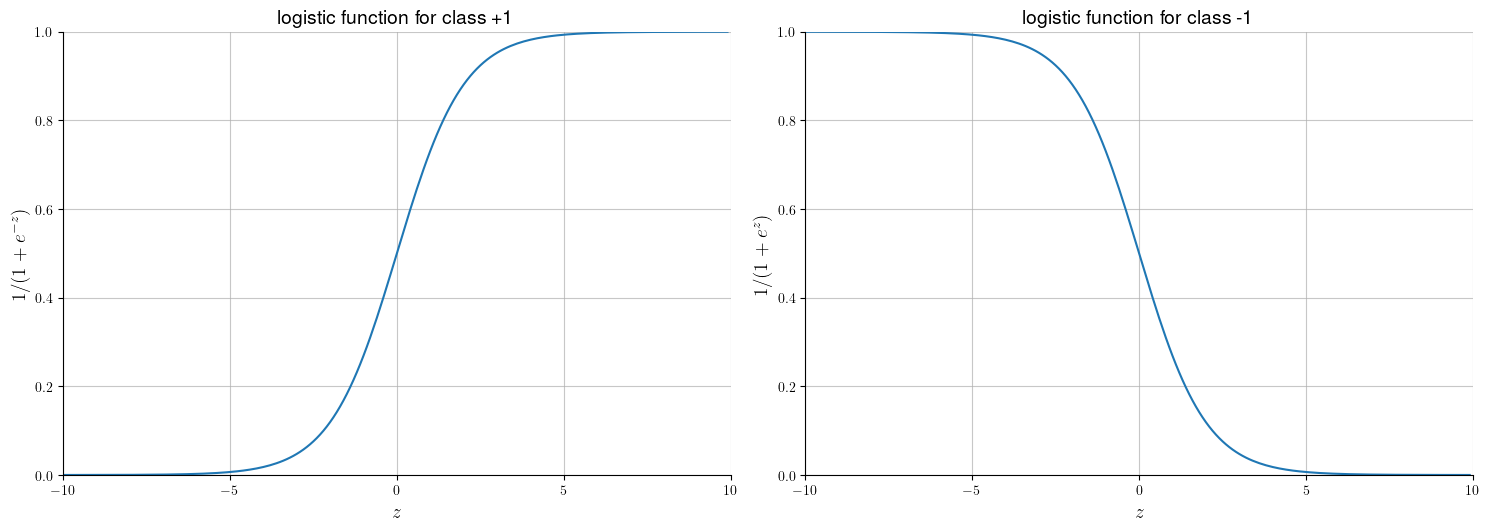

In [182]:
z = np.arange(-10 , 10, 0.1)

f1 = 1/(1+np.exp(-z))
f2 = 1/(1+np.exp(z))

#figure 1 (sigmoidal functions)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=15, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.plot(z, f1)
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$1/(1+e^{-z})$', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xlim([-10, 10])
plt.xticks(np.arange(-10, 15, 5))
ax.grid(alpha=0.7)
ax.set_title('logistic function for class +1', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(222)
ax.plot(z, f2)
ax.set_xlabel(r'$z$', fontsize=14)
ax.set_ylabel(r'$1/(1+e^z)$', fontsize=14)
ax.set_ylim([0, 1])
ax.set_xlim([-10, 10])
plt.xticks(np.arange(-10, 15, 5))
ax.grid(alpha=0.7)
ax.set_title('logistic function for class -1', fontsize=14)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

plt.savefig("figs/fig-1.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.1** Typical behavior of logistic functions for two classes. The figure shows plots of the functions $1/(1+e^{-z})$ ($\textit{left}$) and $1/(1+e^z)$ ($\textit{right}$) assumed to correspond to classes $+1$ and $-1$, respectively.

## Example 59.1 (Binary classification using logistic regression)

In Fig. 59.3 we show a collection of $150$ feature points $h_n\in\mathbb{R}^{2}$ whose classes $\gamma(n)\in \{\pm 1\}$ are known beforehand. The data arises from the dimensionally reduced iris dataset from Example 57.4. We denoted the two-dimensional reduced feature vectors in that example by the notation $h_n'$, but will revert to the notation $h_n$ here. We employ the two classes shown in the bottom plot of Fig. 57.5 and denote them by $\gamma(n)\in\{\pm 1\}$.

In [184]:
iris_normalized_data = scipy.io.loadmat("data/iris_data_feature_dimension_reduced_two_labels.mat") # loads normalized Iris features reduced to dimension 2 x 1
C2 = iris_normalized_data["labelsz"] # thus column contains the label variables gamma + 1 and - 1
A2 = iris_normalized_data["Az"] # feature vectors in row form of size 2 x 1 each

N = max(A2.shape)

Z_0 = (A2[np.argwhere(C2.reshape(-1) == 1)]).reshape(-1, 2)
Z_1 = (A2[np.argwhere(C2.reshape(-1) == -1)]).reshape(-1, 2)

N_0 = max(Z_0.shape) # class + 1
N_1 = max(Z_1.shape) # class - 1

# Running logistic regression
N_test = round(0.2*N) # number of test data separated for testing (20%)
A2_test = A2[N-N_test:N]
A2_train = A2[:N-N_test]
C2_test = C2[N-N_test:N]
C2_train = C2[:N-N_test]
N_train = max(A2_train.shape)
rho = 0 # regularization factor
mu = 0.5 # step-size
passes = 5

Z_0_train = (A2_train[np.argwhere(C2_train.reshape(-1) == 1)]).reshape(-1, 2)
Z_0_test = (A2_test[np.argwhere(C2_test.reshape(-1) == 1)]).reshape(-1, 2)
Z_1_train = (A2_train[np.argwhere(C2_train.reshape(-1) == -1)]).reshape(-1, 2)
Z_1_test = (A2_test[np.argwhere(C2_test.reshape(-1) == -1)]).reshape(-1, 2)

w,test_predictions,likelihood,E,accuracy_curve = logistic_regression_2(A2_train,A2_test,C2_train,C2_test,passes,mu,rho)

# let w = [-theta w2 w3].T, h = [1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0
z = np.arange(-4, 4, 0.1)
h2 = z 
h3 = (-w[0] - h2*w[1])/w[2]

print("Empirical error rate for logistic regression on test data (%): ", E)

N = max(A2_train.shape)

Empirical error rate for logistic regression on test data (%):  0.0


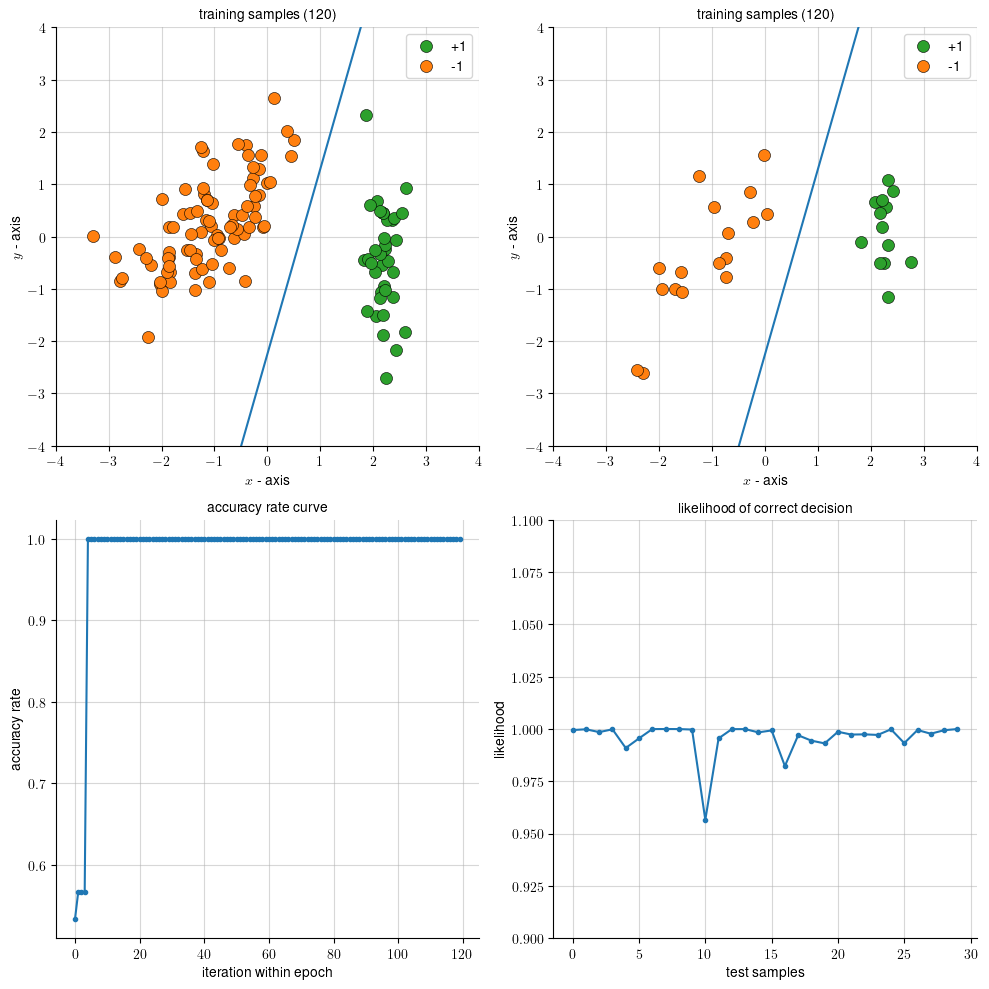

In [185]:
# figure 3 (logistic regression simulation)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(Z_0_train[:, 0], Z_0_train[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="+1")
ax.scatter(Z_1_train[:, 0], Z_1_train[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="-1")
ax.plot(h2, h3)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training samples (120)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(Z_0_test[:, 0], Z_0_test[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="+1")
ax.scatter(Z_1_test[:, 0], Z_1_test[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="-1")
ax.plot(h2, h3)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training samples (120)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(223)
ax.plot(np.arange(N), accuracy_curve, "-o", markersize=3)
ax.set_xlabel("iteration within epoch", fontsize=10)
ax.set_ylabel("accuracy rate", fontsize=10)
ax.set_title("accuracy rate curve", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(224)
ax.plot(np.arange(N_test), likelihood, "-o", markersize=3)
ax.set_xlabel("test samples", fontsize=10)
ax.set_ylabel("likelihood", fontsize=10)
ax.set_title("likelihood of correct decision", fontsize=10)
ax.set_ylim([0.9, 1.1])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

plt.savefig("figs/fig-3.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.3** The plots in the first row show the $120$ data samples used for training ($\textit{left}$) and the $30$ data samples using for testing ($\textit{right}$). The separation line is obtained by running the stochastic gradient logistic algorithm (59.15). The algorithm performs five passes over the training data using $\mu=0.5$. The rightmost plot in the second row shows the likelihood values for each of the test feature vectors, i.e., the probability that its classification is correct using (59.6).

The feature vectors are extended according to (59.16). We split the data into two sets: 120 points ($80\%$) are selected randomly and used for training, while the remaining $30$ points ($20\%$) are used for testing. These two sets are exclusive of each other and no data point from one set  appears in the other set.   We  use the 120 samples to train a logistic classifier using the stochastic gradient recursion (59.15) without regularization ($\rho=0$) and with step size $\mu=0.5$. We also employ random reshuffling. Specifically,  we run five epochs with the data reshuffled at the start of each epoch, and the algorithm runs over the reshuffled data starting from the weight iterate obtained at the end of the previous pass. The lines in the figure show the resulting separating curve. At the end of the training phase, we assess the empirical error rate of the classifier on the test data and find that it leads to zero errors. We also show in the figure the likelihood values for each of the test feature vectors, i.e., the probability that its classification is correct, by using expression (59.6) with $w$ replaced by $w^{\star}$. In the bottom row on the left we show the accuracy rate curve over the first 30 iterations of the $\textit{first epoch}$ in order to illustrate how the error rate decreases over time. For each of these initial iterations, the weight iterate $w_n$ is used to classify the data and the resulting accuracy rate is plotted. It is seen that, for this example, the error rate quickly drops to zero (or the accuracy rate quickly reaches $100$%).

## Example 59.2 (Applying OvA to the iris dataset)

We consider the dimensionally reduced iris dataset from the top plot of Fig. 57.5. There are three classes denoted by $r\in \{0,1,2\}$ corresponding to the setosa ($r=0$), versicolor ($r=1$), and virginica ($r=2$) flower types. There are also a total of $N=150$ samples. The plots in Fig. 59.5 show all data samples, along with the groupings that result from considering samples from one class against the combined samples from the other two classes. 

In [186]:
iris_data_reduced = scipy.io.loadmat("data/iris_data_feature_dimension_reduced.mat") # loads normalized Iris features reduced to dimension 2x1, classes 0, 1, 2
C2 = iris_data_reduced["labels2"] # this column contains the label variables gamma: 0, 1, 2
A2 = iris_data_reduced["A2"] # feature vectors in row form of size 2x1 each

N = max(A2.shape)
N_test = round(0.2*N) # number of test data separated for testing (20%)
A_test = A2[N-N_test:N]
C_test = C2[N-N_test:N]

# We transform the data into three different sets with two classes 0 vs (1,2), 1 vs (0,2), 2 vs (0,1)
A0_12 = A2.copy() # class 0 becomes +1 and classes 1 and 2 become - 1
labels0_12 = np.ones(N)
for n in range(N):
    if C2[n] != 0: # classes 1 and 2 become -1
        labels0_12[n] = - 1

A1_02 = A2.copy() # class 1 becomes +1 and classes 0 and 2 become - 1
labels1_02 = np.ones(N)
for n in range(N):
    if C2[n] != 1: # classes 0 and 2 become -1
        labels1_02[n] = - 1

A2_01 = A2.copy() # class 2 becomes +1 and classes 0 and 1 become - 1
labels2_01 = np.ones(N)
for n in range(N):
    if C2[n] != 2: # classes 0 and 1 become -1
        labels2_01[n] = - 1

# prepare data for plotting
Z_0_12_p1 = (A0_12[np.argwhere(labels0_12.reshape(-1) == 1)]).reshape(-1, 2)
Z_0_12_m1 = (A0_12[np.argwhere(labels0_12.reshape(-1) == -1)]).reshape(-1, 2)

Z_1_02_p1 = (A1_02[np.argwhere(labels1_02.reshape(-1) == 1)]).reshape(-1, 2)
Z_1_02_m1 = (A1_02[np.argwhere(labels1_02.reshape(-1) == -1)]).reshape(-1, 2)

Z_2_01_p1 = (A2_01[np.argwhere(labels2_01.reshape(-1) == 1)]).reshape(-1, 2)
Z_2_01_m1 = (A2_01[np.argwhere(labels2_01.reshape(-1) == -1)]).reshape(-1, 2)

Z_0 = (A2[np.argwhere(C2.reshape(-1) == 0)]).reshape(-1, 2)
Z_1 = (A2[np.argwhere(C2.reshape(-1) == 1)]).reshape(-1, 2)
Z_2 = (A2[np.argwhere(C2.reshape(-1) == 2)]).reshape(-1, 2)

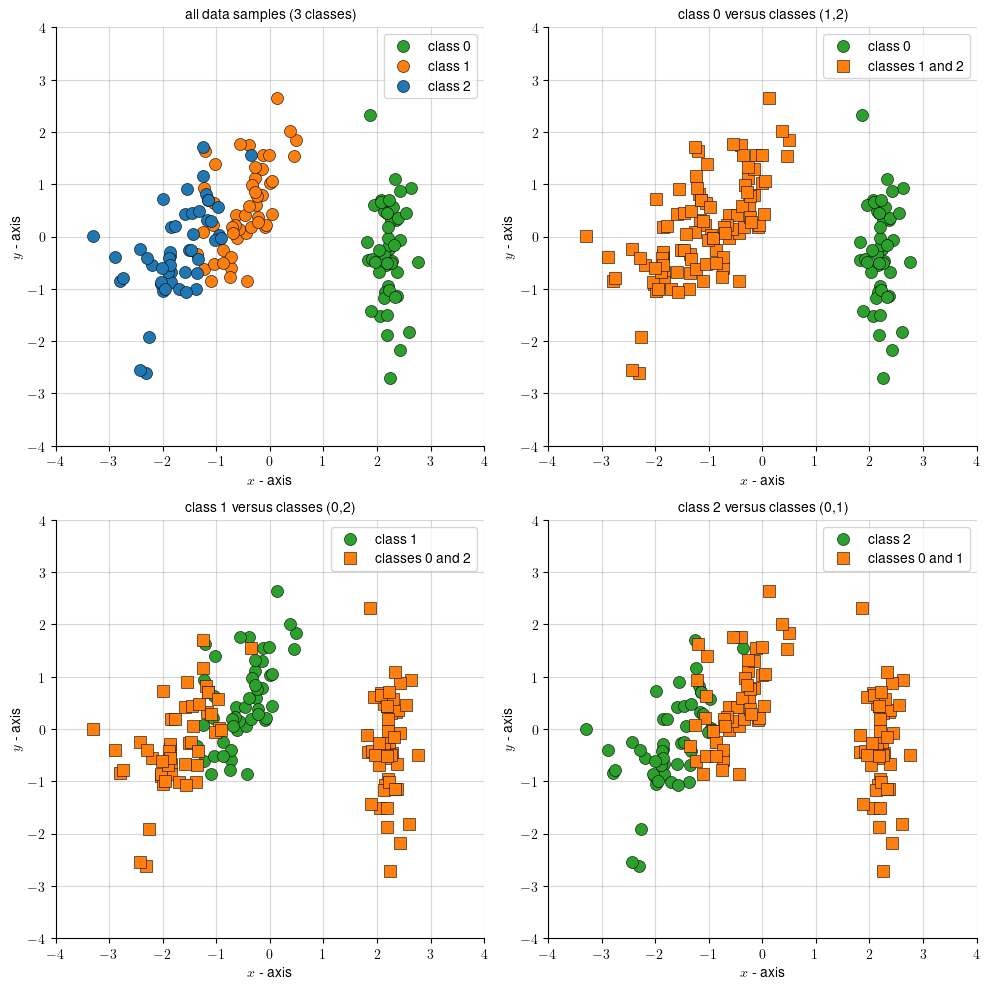

In [187]:
# figure 5 (logistic regression simulation)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1")
ax.scatter(Z_2[:, 0], Z_2[:, 1], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("all data samples (3 classes)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(Z_0_12_p1[:, 0], Z_0_12_p1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_0_12_m1[:, 0], Z_0_12_m1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="classes 1 and 2", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("class 0 versus classes (1,2)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(223)
ax.scatter(Z_1_02_p1[:, 0], Z_1_02_p1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 1")
ax.scatter(Z_1_02_m1[:, 0], Z_1_02_m1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="classes 0 and 2", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("class 1 versus classes (0,2)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(224)
ax.scatter(Z_2_01_p1[:, 0], Z_2_01_p1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 2")
ax.scatter(Z_2_01_m1[:, 0], Z_2_01_m1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="classes 0 and 1", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("class 2 versus classes (0,1)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-5.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.5** The top left plot shows all data samples from the three classes $r=0,1,2$. The other plots show the groupings that result from considering samples from one class against the combined samples from the other two classes.

The feature vectors are extended according to (59.16). A collection of $120$ samples are selected for training while the remaining $30$ samples are used for testing. We  use the 120 samples to train a logistic classifier using the stochastic gradient recursion (59.15) with  $\mu=0.01$ and $\rho=0.1$. Five passes of the algorithm with random reshuffling are applied to the data resulting in (where, for completeness, we are highlighting the offset and weight vector parameters):

$$
\begin{bmatrix}-\theta^{\star}_{0,12} \\ w^{\star}_{0,12}\end{bmatrix} = \begin{bmatrix} -0.4813\\\hline
1.1256\\
-0.3421\end{bmatrix} \;\;\; \textnormal{(to separate class 0 from classes (1,2))} \tag{59.29a}
$$

and

$$
\begin{bmatrix}-\theta^{\star}_{1,02}\\ w^{\star}_{1,02}\end{bmatrix} =\begin{bmatrix} -0.4134\\\hline
-0.1498\\
0.5381\end{bmatrix}\;\;\;\;
(\textnormal{to separate class 1 from classes (0,2)}) \tag{59.29b}
$$

and

$$
\begin{bmatrix}-\theta^{\star}_{2,01}\\ w^{\star}_{2,01}\end{bmatrix} =\begin{bmatrix}
-0.4931\\\hline
-0.8530\\
-0.2329\end{bmatrix}\;\;\;\;
(\textnormal{to separate class 2 from classes (0,1)}) \tag{59.29}
$$

 Figure 59.6 shows the training data and the test data. It also shows the resulting separating lines. It is clear from the plot on the right in the top row of the figure that it is not possible to separate class $r=1$ from the combined classes $r\in\{0,2\}$ by means of a linear classifier. The same is true, albeit to a lesser extent, for separating class $r=2$ from the combined classes $r\in\{0,1\}$. The empirical error rates obtained over the training data in each of the three cases shown in the figure are $0\%$ for separating $r=0$ from $r\in\{1,2\}$, $26.67\%$ for separating $r=1$ from $r\in\{0,2\}$, and $13.33\%$ 
for separating $r=2$ from $r\in\{0,1\}$.

In [229]:
# Running logistic regression separating 0 from (1, 2)
mu = 0.01 # step-size
rho = 0.1 # l2-regularization
number_of_passes = 5 # number of passes over data

# separating 0 from (1,2)
N_test = round(0.2*N) # number of test data separated for testing 20%
A2_test_0_12 = A0_12[N-N_test:N]
A2_train_0_12 = A0_12[:N-N_test]
C2_test_0_12 = labels0_12[N-N_test:N]
C2_train_0_12 = labels0_12[:N-N_test]
N_train = max(A2_train_0_12.shape)

w0_12,test_predictions0_12,likelihood0_12,E0_12 = logistic_regression(A2_train_0_12,A2_test_0_12,C2_train_0_12,C2_test_0_12,number_of_passes,mu,rho)

print("Empirical error separating class 0 from (1,2): ", E0_12)

# let w = [-theta w2 w3].T, h = [1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0
z = np.arange(-4, 4, 0.1)
h2_0_12 = z 
h3_0_12 = (-w0_12[0] - h2_0_12*w0_12[1])/w0_12[2] # used to plot the separating line

# separating 1 from (0,2)
A2_test_1_02 = A1_02[N-N_test:N]
A2_train_1_02 = A1_02[:N-N_test]
C2_test_1_02 = labels1_02[N-N_test:N]
C2_train_1_02 = labels1_02[:N-N_test]
N_train = max(A2_train_1_02.shape)

w1_02,test_predictions1_02,likelihood1_02,E1_02 = logistic_regression(A2_train_1_02,A2_test_1_02,C2_train_1_02,C2_test_1_02,number_of_passes,mu,rho)

print("Empirical error separating class 1 from (0,2): ", E1_02)

z = np.arange(-4, 4, 0.1)
h2_1_02 = z 
h3_1_02 = (-w1_02[0] - h2_1_02*w1_02[1])/w1_02[2] # used to plot the separating line

# separating 2 from (0,1)
A2_test_2_01 = A2_01[N-N_test:N]
A2_train_2_01 = A2_01[:N-N_test]
C2_test_2_01 = labels2_01[N-N_test:N]
C2_train_2_01 = labels2_01[:N-N_test]
N_train = max(A2_train_2_01.shape)

w2_01,test_predictions2_01,likelihood2_01,E2_01 = logistic_regression(A2_train_2_01,A2_test_2_01,C2_train_2_01,C2_test_2_01,number_of_passes,mu,rho)

print("Empirical error separating class 2 from (0,1): ", E2_01)

z = np.arange(-4, 4, 0.1)
h2_2_01 = z 
h3_2_01 = (-w2_01[0] - h2_2_01*w2_01[1])/w2_01[2] # used to plot the separating line

C_test_prediction = -np.ones(N_test)
max_likelihood = np.zeros(N_test)

A_test = A2[N-N_test:N]
C_test = C2[N-N_test:N]

A_test = np.concatenate([np.ones((N_test, 1)), A_test], axis=-1)

like0 = np.zeros(N_test)
like1 = np.zeros(N_test)
like2 = np.zeros(N_test)

M = A_test.shape[-1]
for n in range(N_test):
    h = A_test[n] # feature vector
    gamma_hat_0 = h@w0_12 
    gamma_hat_1 = h@w1_02 
    gamma_hat_2 = h@w2_01 

    s_0 = 1 + np.exp(-gamma_hat_0) # there is no gamma here because we want the likelihood og belonging to class + 1
    s_1 = 1 + np.exp(-gamma_hat_1) # there is no gamma here because we want the likelihood og belonging to class + 1
    s_2 = 1 + np.exp(-gamma_hat_2) # there is no gamma here because we want the likelihood og belonging to class + 1

    like0[n] = 1/s_0
    like1[n] = 1/s_1
    like2[n] = 1/s_2

    a = max([like0[n], like1[n], like2[n]])
    index = np.argmax([like0[n], like1[n], like2[n]])

    C_test_prediction[n] = index
    max_likelihood[n] = a

xx = np.abs(C_test.squeeze() - C_test_prediction)
aamdc = (xx != 0) # nonzero entries will become one

empirical_error = (aamdc.sum()/aamdc.shape[0])*100
print("OvA empirical error on test dara (%)", empirical_error)


Z_0 = (A_test[np.argwhere(C_test.reshape(-1) == 0)]).reshape(-1, 3)
Z_1 = (A_test[np.argwhere(C_test.reshape(-1) == 1)]).reshape(-1, 3)
Z_2 = (A_test[np.argwhere(C_test.reshape(-1) == 2)]).reshape(-1, 3)

Z_0_p = (A_test[np.argwhere(C_test_prediction.reshape(-1) == 0)]).reshape(-1, 3)
Z_1_p = (A_test[np.argwhere(C_test_prediction.reshape(-1) == 1)]).reshape(-1, 3)
Z_2_p = (A_test[np.argwhere(C_test_prediction.reshape(-1) == 2)]).reshape(-1, 3)

Z_0_12_p1_train = (A2_train_0_12[np.argwhere(C2_train_0_12.reshape(-1) == 1)]).reshape(-1, 2)
Z_0_12_m1_train = (A2_train_0_12[np.argwhere(C2_train_0_12.reshape(-1) == -1)]).reshape(-1, 2)

Z_1_02_p1_train = (A2_train_1_02[np.argwhere(C2_train_1_02.reshape(-1) == 1)]).reshape(-1, 2)
Z_1_02_m1_train = (A2_train_1_02[np.argwhere(C2_train_1_02.reshape(-1) == -1)]).reshape(-1, 2)

Z_2_01_p1_train = (A2_train_2_01[np.argwhere(C2_train_2_01.reshape(-1) == 1)]).reshape(-1, 2)
Z_2_01_m1_train = (A2_train_2_01[np.argwhere(C2_train_2_01.reshape(-1) == -1)]).reshape(-1, 2)

like = np.stack([like0, like1, like2]).max(axis=0)

Empirical error separating class 0 from (1,2):  0.0
Empirical error separating class 1 from (0,2):  26.666666666666668
Empirical error separating class 2 from (0,1):  13.333333333333334
OvA empirical error on test dara (%) 16.666666666666664


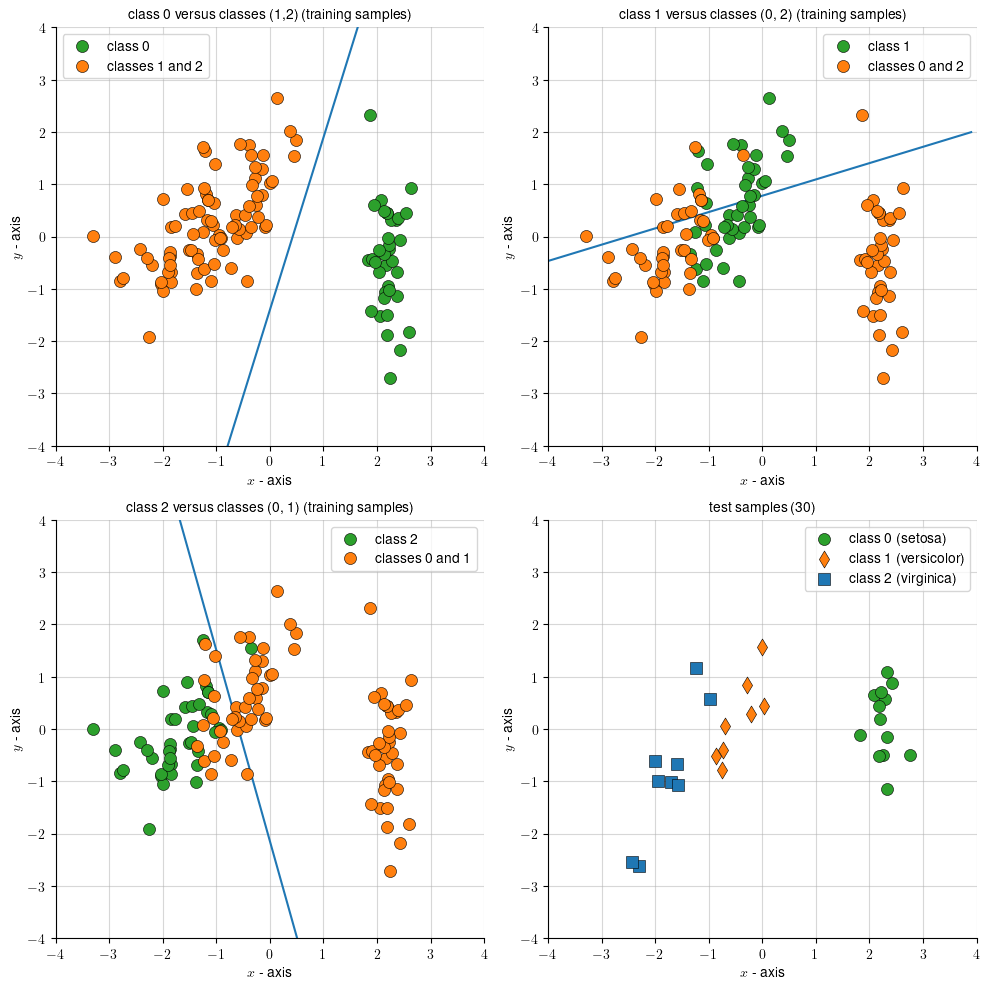

In [191]:
# figure 6 (logistic regression simulation)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(Z_0_12_p1_train[:, 0], Z_0_12_p1_train[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_0_12_m1_train[:, 0], Z_0_12_m1_train[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="classes 1 and 2")
ax.plot(h2_0_12, h3_0_12)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("class 0 versus classes (1,2) (training samples)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(Z_1_02_p1_train[:, 0], Z_1_02_p1_train[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 1")
ax.scatter(Z_1_02_m1_train[:, 0], Z_1_02_m1_train[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="classes 0 and 2")
ax.plot(h2_1_02, h3_1_02)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("class 1 versus classes (0, 2) (training samples)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(223)
ax.scatter(Z_2_01_p1_train[:, 0], Z_2_01_p1_train[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 2")
ax.scatter(Z_2_01_m1_train[:, 0], Z_2_01_m1_train[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="classes 0 and 1")
ax.plot(h2_2_01, h3_2_01)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("class 2 versus classes (0, 1) (training samples)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(224)
ax.scatter(Z_0[:, 1], Z_0[:, 2], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0 (setosa)")
ax.scatter(Z_1[:, 1], Z_1[:, 2], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1 (versicolor)", marker="d")
ax.scatter(Z_2[:, 1], Z_2[:, 2], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2 (virginica)", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("test samples (30)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-6.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.6** The bottom right plot shows the test data. The other plots show the logistic regression classifier that is obtained in each case. It is clear that it is possible to classify without errors the training data in the top-left plot related to separating class $r=0$ from $r\in\{1,2\}$. The same is not true for the other two cases. In particular, it is not possible to separate class $r=1$ from the combined classes $r\in\{0,2\}$ by means of a linear classifier.

Next, for each test vector $h$, we use expression (59.24) to determine the likelihood that it belongs to class $r\in\{0,1,2\}$. The bottom plot in Fig. 59.7 shows the $\textit{largest}$  likelihood value for each test sample. The top plot on the right shows the  predicted labels over the test data. The samples that are misclassified are marked in this plot by red. It is observed that five samples are misclassified, resulting in an empirical error rate of $16.67\%$ over the test data (or 5 errors out of 30 samples).

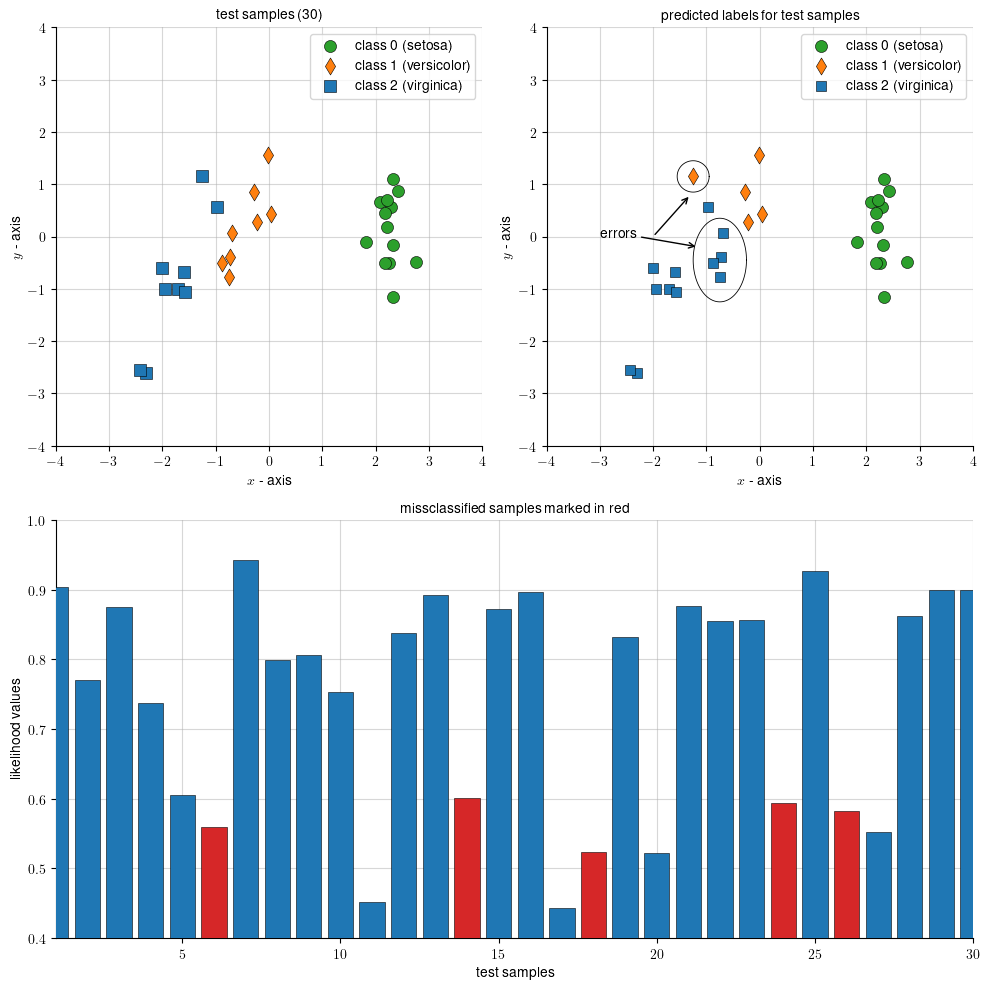

In [251]:
# figure 7 (likelihoods)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
ax.scatter(Z_0[:, 1], Z_0[:, 2], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0 (setosa)")
ax.scatter(Z_1[:, 1], Z_1[:, 2], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1 (versicolor)", marker="d")
ax.scatter(Z_2[:, 1], Z_2[:, 2], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2 (virginica)", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("test samples (30)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()


ax = fig.add_subplot(2, 2, 2)
ax.scatter(Z_0_p[:, 1], Z_0_p[:, 2], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0 (setosa)")
ax.scatter(Z_1_p[:, 1], Z_1_p[:, 2], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1 (versicolor)", marker="d")
ax.scatter(Z_2_p[:, 1], Z_2_p[:, 2], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=60, label="class 2 (virginica)", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("predicted labels for test samples", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

#Plot the elipse
u = -0.75
v = -0.45
a = 0.5
b = 0.8
t = np.linspace(0, 2*np.pi, 100)
ax.plot( u+a*np.cos(t) , v+b*np.sin(t), color="black", linewidth=0.6)

u = -1.25
v = 1.15
a = 0.3
b = 0.3
t = np.linspace(0, 2*np.pi, 100)
ax.plot( u+a*np.cos(t) , v+b*np.sin(t), color="black", linewidth=0.6)
ax.annotate("errors", xy=(-1.15, -0.2), xytext=(-3, 0), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10, fontweight='bold')
ax.annotate("", xy=(-1.3, 0.8), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10, fontweight='bold')

plt.legend()

ax = fig.add_subplot(2, 2, (3, 4))

color = ["tab:blue"]*N_test

for n in range(N_test):
    if not (C_test.squeeze() == C_test_prediction)[n]: # marker in red the missclassified examples
        color[n] = "tab:red"

ax.set_title("missclassified samples marked in red", fontsize=10)
ax.set_xlabel("test samples", fontsize=10)
ax.set_ylabel("likelihood values", fontsize=10)
barlist = ax.bar(np.arange(1, N_test+1), like, zorder=3, edgecolor="black", linewidth=0.4, color=color)
ax.set_ylim([0.4, 1])
ax.set_xlim(1, 30)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()

plt.savefig("figs/fig-7.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.7** The bottom plot shows the $\textit{largest}$ likelihood value for each test sample. The top right plot shows the resulting predicted labels over the test data. It is observed that five test samples are misclassified. 

## Example 59.3 (Applying OvO to the iris dataset)

We consider the same setting from Example 59.2 except that we now apply the OvO procedure. There are three classes denoted by $r\in\{0,1,2\}$ corresponding to the setosa ($r=0$), versicolor ($r=1$), and virginica ($r=2$) flower types. There are also a total of $N=150$ samples: 120 of them are selected for training and the remaining $30$ samples are used for testing. The plots in Fig. 59.9 show all training samples, along with the pairings that result from considering samples from one class against the samples from another class.

In [294]:
iris_data_reduced = scipy.io.loadmat("data/iris_data_feature_dimension_reduced.mat") # loads normalized Iris features reduced to dimension 2x1, classes 0, 1, 2
C2 = iris_data_reduced["labels2"] # this column contains the label variables gamma: 0, 1, 2
A2 = iris_data_reduced["A2"] # feature vectors in row form of size 2x1 each

# separating 0 from (1,2)
N_test = round(0.2*N) # number of test data separated for testing 20%
A2_test = A2[N-N_test:N]
A2_train = A2[:N-N_test]
C2_test = C2[N-N_test:N]
C2_train = C2[:N-N_test]
N_train = max(A2_train.shape)

index_01 = np.concatenate([np.argwhere(C2_train.squeeze() == 0).squeeze(), np.argwhere(C2_train.squeeze() == 1).squeeze()])
index_01.sort()
A01 = A2_train[index_01]
labels01 = (C2_train[index_01]).squeeze().astype(np.int16)
for i, label in enumerate(labels01):
    if label == 0:
        labels01[i] = 1
    else:
        labels01[i] = -1

index_02 = np.concatenate([np.argwhere(C2_train.squeeze() == 0).squeeze(), np.argwhere(C2_train.squeeze() == 2).squeeze()])
index_02.sort()
A02 = A2_train[index_02]
labels02 = (C2_train[index_02]).squeeze().astype(np.int16)
for i, label in enumerate(labels02):
    if label == 0:
        labels02[i] = 1
    else:
        labels02[i] = -1

index_12 = np.concatenate([np.argwhere(C2_train.squeeze() == 1).squeeze(), np.argwhere(C2_train.squeeze() == 2).squeeze()])
index_12.sort()
A12 = A2_train[index_12]
labels12 = (C2_train[index_12]).squeeze().astype(np.int16)
for i, label in enumerate(labels12):
    if label == 1:
        labels12[i] = 1
    else:
        labels12[i] = -1

# preparing data for plotting
Z_0 = (A2_train[np.argwhere(C2_train.reshape(-1) == 0)]).reshape(-1, 2)
Z_1 = (A2_train[np.argwhere(C2_train.reshape(-1) == 1)]).reshape(-1, 2)
Z_2 = (A2_train[np.argwhere(C2_train.reshape(-1) == 2)]).reshape(-1, 2)

Z_01_p1 = (A01[np.argwhere(labels01 == 1)]).reshape(-1, 2)
Z_01_m1 = (A01[np.argwhere(labels01 == -1)]).reshape(-1, 2)

Z_02_p1 = (A02[np.argwhere(labels02 == 1)]).reshape(-1, 2)
Z_02_m1 = (A02[np.argwhere(labels02 == -1)]).reshape(-1, 2)

Z_12_p1 = (A12[np.argwhere(labels12 == 1)]).reshape(-1, 2)
Z_12_m1 = (A12[np.argwhere(labels12 == -1)]).reshape(-1, 2)

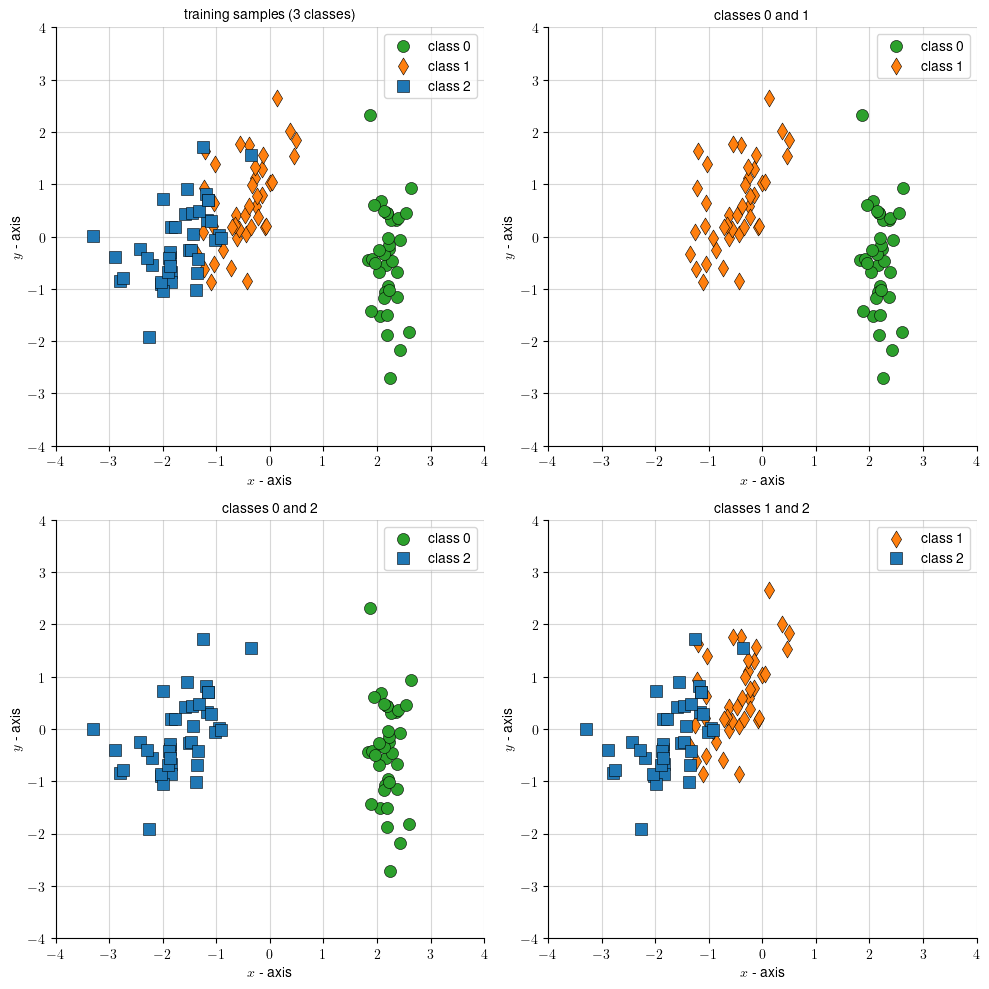

In [301]:
# figure 9 (data)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(Z_0[:, 0], Z_0[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_1[:, 0], Z_1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1", marker="d")
ax.scatter(Z_2[:, 0], Z_2[:, 1], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("training samples (3 classes)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(Z_01_p1[:, 0], Z_01_p1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_01_m1[:, 0], Z_01_m1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1", marker="d")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("classes 0 and 1", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(223)
ax.scatter(Z_02_p1[:, 0], Z_02_p1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_02_m1[:, 0], Z_02_m1[:, 1], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("classes 0 and 2", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(224)
ax.scatter(Z_12_p1[:, 0], Z_12_p1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1", marker="d")
ax.scatter(Z_12_m1[:, 0], Z_12_m1[:, 1], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("classes 1 and 2", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-9.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.9** The top left plot shows all training samples from the three classes $r=0,1,2$. The other plots show the pairings that result from considering samples from one class against  samples from another class.

We again extend the feature vectors according to  (59.16) and apply five passes of the $\ell_2-$ regularized logistic regression algorithm (59.15)  using $\mu=0.01$ and $\rho=0.1$.  Using random reshuffling, the simulation leads to (where we are showing both the offset and the weight parameters for completeness):

$$
\begin{bmatrix}-\theta^{\star}_{01}\\ w^{\star}_{01}\end{bmatrix} =\begin{bmatrix}
-0.2800\\\hline
0.9675\\
-0.4310\end{bmatrix}\;\;\;\;
(\textnormal{to separate class 0 from classe 1}) \tag{59.30a}
$$

and

$$
\begin{bmatrix}-\theta^{\star}_{02}\\ w^{\star}_{02}\end{bmatrix} =\begin{bmatrix} -0.1095\\\hline
1.1166\\
-0.0912
\end{bmatrix}\;\;\;\;
(\textnormal{ to separate class 0 from class 2}) \tag{59.30b}
$$

and

$$
\begin{bmatrix}-\theta^{\star}_{12}\\ w^{\star}_{12}\end{bmatrix} =\begin{bmatrix}
0.1993\\\hline
0.5390\\
0.3971\end{bmatrix}\;\;\;\;\;\;\;
(\textnormal{to separate class 1 from class 2})  \tag{59.30c}
$$

Figure 59.10 shows the training data and the test data. It also shows the resulting separating lines. It is clear from the plot on the right in the top row  that classes $r=1$ and $r=2$ are not separable by a linear classifier. The middle plots in the figure show the original test data and the predicted labels. It is seen that there are 5 misclassifications (out of 30 test samples),  resulting in an empirical error rate of $13.33\%$.

In [325]:
# Running logistic regression
# separating 0 from 1
mu = 0.01 # step-size
rho = 0.1 # l2-regularization
number_of_passes = 5 # number of passes over data

# we are only interested in w01; ignore all other outputs; the inputs A_test and C_test are IRRELEVANT HERE <<<<<<< IGNORE
w01,test_predictions01,likelihood01,E01 = logistic_regression(A01,A01,labels01,labels01,number_of_passes,mu,rho)
z = np.arange(-4, 4, 0.1)
h2_01 = z 
h3_01 = (-w01[0] - h2_01*w01[1])/w01[2] # used to plot the separating line

# separating 0 from 2
# we are only interested in w02; ignore all other outputs; the inputs A_test and C_test are IRRELEVANT HERE <<<<<<< IGNORE
w02,test_predictions02,likelihood02,E02 = logistic_regression(A02,A02,labels02,labels02,number_of_passes,mu,rho)
z = np.arange(-4, 4, 0.1)
h2_02 = z 
h3_02 = (-w02[0] - h2_02*w02[1])/w02[2] # used to plot the separating line

# separating 1 from 2
# we are only interested in w12; ignore all other outputs; the inputs A_test and C_test are IRRELEVANT HERE <<<<<<< IGNORE
w12,test_predictions12,likelihood12,E12 = logistic_regression(A12,A12,labels12,labels12,number_of_passes,mu,rho)
z = np.arange(-4, 4, 0.1)
h2_12 = z 
h3_12 = (-w12[0] - h2_12*w12[1])/w12[2] # used to plot the separating line

# computing likelihood that each test vector belongs to class +1
error = 0
C_test_prediction = -np.ones(N_test)
vote = np.zeros(N_test)
for n in range(N_test):
    vote_0 = 0 # number of votes for class 0
    vote_1 = 0 # number of votes for class 1
    vote_2 = 0 # number of votes for class 2
    h = A_test[n]
    gamma = C_test[n]
    gamma_hat_01 = h@w01
    gamma_hat_02 = h@w02
    gamma_hat_12 = h@w12

    if gamma_hat_01 >= 0:
        vote_0 += 1
    else:
        vote_1 += 1
    if gamma_hat_02 >= 0:
        vote_0 += 1
    else:
        vote_2 += 1
    if gamma_hat_12 >= 0:
        vote_1 += 1
    else:
        vote_2 += 1

    a = max([vote_0, vote_1, vote_2])
    index = np.argmax([vote_0, vote_1, vote_2])
    C_test_prediction[n] = index 
    vote[n] = a
    
xx = abs(C_test.squeeze() - C_test_prediction)
aamdc = (xx!=0) # nonzero entries will become one

empirical_error = (aamdc.sum()/N_test)*100
print("OvO empirical error on test data (%): ", empirical_error)

Z_0_t = (A_test[np.argwhere(C_test.reshape(-1) == 0)]).reshape(-1, 3)
Z_1_t = (A_test[np.argwhere(C_test.reshape(-1) == 1)]).reshape(-1, 3)
Z_2_t = (A_test[np.argwhere(C_test.reshape(-1) == 2)]).reshape(-1, 3)

Z_0_p = (A_test[np.argwhere(C_test_prediction.reshape(-1) == 0)]).reshape(-1, 3)
Z_1_p = (A_test[np.argwhere(C_test_prediction.reshape(-1) == 1)]).reshape(-1, 3)
Z_2_p = (A_test[np.argwhere(C_test_prediction.reshape(-1) == 2)]).reshape(-1, 3)

OvO empirical error on test data (%):  13.333333333333334


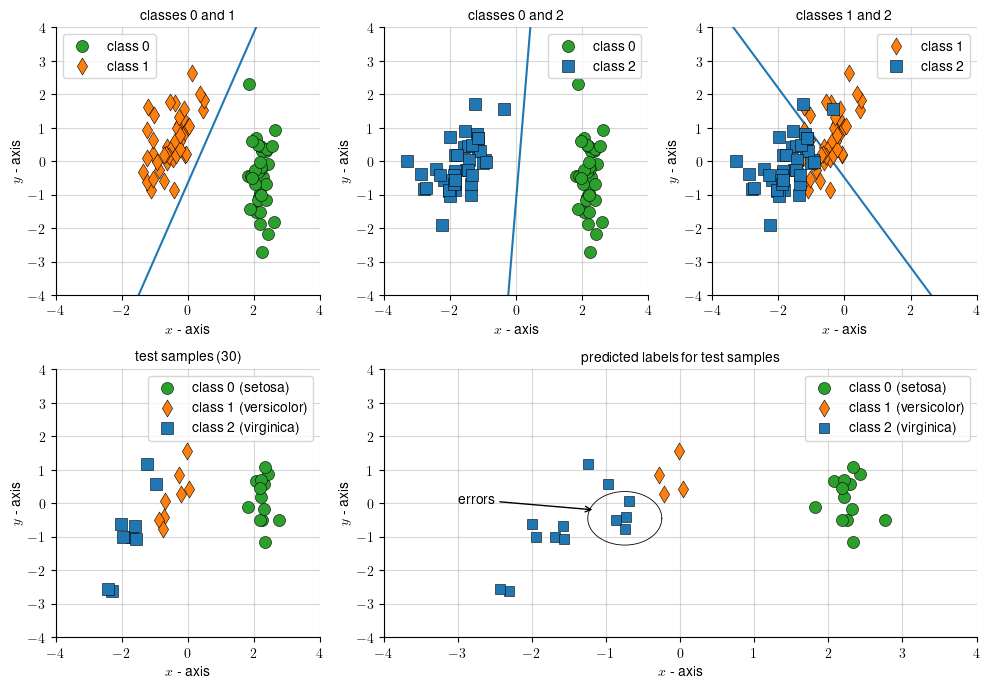

In [333]:
# figure 10 (data)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(3, 3, 1)
ax.scatter(Z_01_p1[:, 0], Z_01_p1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_01_m1[:, 0], Z_01_m1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1", marker="d")
ax.plot(h2_01, h3_01)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("classes 0 and 1", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(3, 3, 2)
ax.scatter(Z_02_p1[:, 0], Z_02_p1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0")
ax.scatter(Z_02_m1[:, 0], Z_02_m1[:, 1], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2", marker="s")
ax.plot(h2_02, h3_02)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("classes 0 and 2", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(3, 3, 3)
ax.scatter(Z_12_p1[:, 0], Z_12_p1[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1", marker="d")
ax.scatter(Z_12_m1[:, 0], Z_12_m1[:, 1], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2", marker="s")
ax.plot(h2_12, h3_12)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("classes 1 and 2", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(3, 3, 4)
ax.scatter(Z_0_t[:, 1], Z_0_t[:, 2], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0 (setosa)")
ax.scatter(Z_1_t[:, 1], Z_1_t[:, 2], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1 (versicolor)", marker="d")
ax.scatter(Z_2_t[:, 1], Z_2_t[:, 2], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=75, label="class 2 (virginica)", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("test samples (30)", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(3, 3, (5, 6))
ax.scatter(Z_0_p[:, 1], Z_0_p[:, 2], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class 0 (setosa)")
ax.scatter(Z_1_p[:, 1], Z_1_p[:, 2], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class 1 (versicolor)", marker="d")
ax.scatter(Z_2_p[:, 1], Z_2_p[:, 2], zorder=3, c="tab:blue", edgecolor="black", linewidth=0.4, s=60, label="class 2 (virginica)", marker="s")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("predicted labels for test samples", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

#Plot the elipse
u = -0.75
v = -0.45
a = 0.5
b = 0.8
t = np.linspace(0, 2*np.pi, 100)
ax.plot( u+a*np.cos(t) , v+b*np.sin(t), color="black", linewidth=0.6)

ax.annotate("errors", xy=(-1.15, -0.2), xytext=(-3, 0), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontsize=10, fontweight='bold')

plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-10.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.10** The top row shows the pairings of classes and the separating lines that result from logistic regression. It is clear that it is not possible to classify without errors the training data in the top rightmost  plot related to separating class $r=1$ from $r=2$. The middle plots show the original test data and the predicted labels. It is seen that there are 5 misclassifications (out of 30 test samples).

## Example 59.4 (Active learning applied to a logistic regression model)

We consider  the $\ell_2-$ regularized logistic regression algorithm (59.15) with the offset parameter set to zero, namely, 

$$
w_{n}=(1-2\mu\rho)w_{n-1}+\mu\dfrac{\gamma(n)h_n}{1+e^{\gamma(n)h_n^{\sf T} w_{n-1}}},\;\;n\geq 0 \tag{59.35}
$$

We generate $N=2000$ random pairs of data $\{\gamma(n),h_n\}$ according to a logistic model. First, a random parameter $w^a\in\mathbb{R}^{10}$ is selected, and a random collection of feature vectors $\{h_n\}$ are generated with zero-mean unit-variance Gaussian entries. Then, for each $h_n$, the label $\gamma(n)$ is set to either $+1$ or $-1$ according to the following construction:

$$
\gamma(n)=+1\;\;\;\textnormal{ if}\;\;\;\Bigl(\frac{1}{1+e^{-h_n^{\sf T} w^a}}\Bigr)\geq 1/2,\;\;\textnormal{ otherwise}\;\gamma(n)=-1 \tag{59.36}
$$

A total of $K=300$ epochs are run over the data, with the data randomly reshuffled prior to each run.  We determine the value of the risk function $P(w)$ at the beginning of each epoch, denoted by $P(w_{-1}^k)$. This results in a learning curve showing how the risk value diminishes with the epoch index. We repeat the experiment $10$ times and average the learning curves to obtain a smoother curve. The learning curves are plotted in normalized logarithmic scale, namely, 

$$
\ln\Bigg(\frac{P(w_{-1}^k)-P(w^\star)}{\max_{k}\{ P(w_{-1}^k)-P(w^\star)\}}\Bigg) \tag{59.37}
$$

where the minimizer $w^{\star}$ for $P(w)$ is "obtained" by applying a batch gradient-descent algorithm on the entire set of data points.  

The simulation uses $\rho=1$, $\mu=0.0001$, and $M=10$. We assume we know the labels for only $40$ data points, while the labels for the remaining $1960$ feature vectors will be requested on demand. We run algorithm (59.35) on the available labeled data points and obtain an initial classifier model, $w_{40}$. Subsequently,  we follow an active learning approach. We select $20$ random samples from among the remaining $1960$ samples. For each of the samples in this batch, we compute the confidence level $p(n)$ and  retain the sample  of least confidence, indexed by $n^o$ according to (59.33). We request the label for this feature vector and use the data point $(\gamma(n^o),h_{n^o})$ to update $w_{40}$ to $w_{41}$. We repeat the procedure $200$ times. Figure 59.11  shows the learning curves for this construction, as well as the resulting weight  for the classifier. It is seen that the learner is able to estimate well the entries of the classifier.  

In [343]:
# active learning applied to a logistic regression model
# l2-regularized logistic regression
# P(w) = rho\|w\|^2 + (1/N)sum_{n=0}^{N-1} ln(1+exp(-gamma(m) h_m' w))

rho = 1 # l2-regularization parameter
mu = 0.0001 # step-size for stochastic gradient

M = 10 # feature size
N = 2000 # number of data points
K = 300 # number of epochs

print("wait....generating data")

# Generating data and checking it
zo = np.random.randn(M) # underlying parameter model for logistic data
p, gamma_vec, H = generate_separable_logistic(N, zo, 0) # logistic model with zero offset
ws, Ps, thetas = logistic_minimizer(rho, gamma_vec, H,0) # learns ws only

wait....generating data


100%|██████████| 5000/5000 [03:01<00:00, 27.47it/s]


In [347]:
winit = np.random.randn(M) # initial condition for weight
experiments = 10

Pmeanactive = np.zeros(K) # learning curve over all epochs under active learning
La = round(N/50) # size of initial labeled samples for training we assume actual labels are only available for this many samples

Lb = round(N/100) # After training on the La samples. we select this many samples at random for pool sampling;
                  # then select the most uncertain sample and ask for its label (it is already generated above)

Lc = round(N/10) # we repeat this process this many times

# learning curve
for ell in tqdm(range(experiments)):
    Pactive = np.zeros(K) # learning curve over epochs under active learning
    wa = winit.copy() # initial condition for weight 

    for k in range(K): # iterating over runs
        for m in range(N): # evaluating empirical risk function at START of each epoch
            h_m = H[:, m] # feature vector
            gamma_m = gamma_vec[m] # label
            a = 1+np.exp(-gamma_m*h_m.T@wa)
            Pactive[k] += np.log(a)
        Pactive[k] = Pactive[k]/N # active learning
        Pactive[k] = Pactive[k] + rho*np.linalg.norm(wa, ord=2)**2 # risk value at start of epoch k

        URR = np.random.permutation(N) # random permutation of the samples
        Hx = np.zeros(H.shape)
        gammax = np.zeros(gamma_vec.shape)
        for ss in range(N): # randomly reshuffle the data
            u = URR[ss]
            Hx[:, ss] = H[:, u]
            gammax[ss] = gamma_vec[u]
        H1 = Hx[:, :La] # Training over the available sample with labels
        gamma1 = gammax[:La]
        
        H2 = Hx[:, La:] # keep the rest in U
        gamma2 = gammax[La:]
        d1, d2 = H2.shape

        for n in range(La): # iterating over data in each epoch 
            h_u = H1[:, n] # feature vector
            gamma_u = gamma1[n] # label
            a = np.exp(-gamma_u*h_u.T@wa)
            s = gamma_u*h_u*a/(1+a) # gradient vector
            wa = (1-2*mu*rho)*wa + mu*s # active learniung
        # end of one epoch

        w_save_labeled = wa.copy() # save the iterate based only on labeled data

        for sx in range(Lc): # sample Lc times
            p = np.zeros(Lb) # for active learningm we will pich Lb samples at random and then the most uncertain
            delta = np.ones(Lb)
            indx_sample = np.zeros(Lb)
            for n in range(Lb): # select Lb random samples
                u = np.random.randint(d2)
                h_u = H2[:, n] # feature vector
                gamma_hat = h_u.T@wa 
                p[n] = 1/(1+np.exp(-gamma_hat))
                delta[n] = np.abs(0.5-p[n])
                indx_sample[n] = u
            minvalue = np.min(delta)
            indx = np.argmin(delta) 
            u = int(indx_sample[indx])
            h_u = H2[:, u]
            gamma_u = gamma2[u] # ask for its label from an ORACLE
            a = np.exp(-gamma_u*h_u.T@wa)
            s = gamma_u*h_u*a/(1+a) # gradient vector
            wa = (1-2*mu*rho)*wa + mu*s # active learning
    Pmeanactive += Pactive 

Pmeanactive = Pmeanactive / experiments

100%|██████████| 10/10 [02:21<00:00, 14.14s/it]

limit points ws wa


In [349]:
print("limit points ws wa", ws, wa)

print("step size", mu)

print("number of labeled training samples", La)

print("number of pooling samples to select the uncertain samples from amont them", Lb)

print("how many times the pooling is repeated", Lc)

print("rho", rho)

print("dimension of model", M)

print("number of runs", K)

print("number of experiments", experiments)

limit points ws wa [[-0.01968019]
 [ 0.04471824]
 [-0.13188685]
 [-0.01462245]
 [-0.01342287]
 [ 0.04108095]
 [-0.02400341]
 [-0.06376075]
 [ 0.0428247 ]
 [-0.05310638]] [-0.02001145  0.04253996 -0.13407815 -0.0151425  -0.01047748  0.04156963
 -0.02618337 -0.06554418  0.04138918 -0.05226657]
step size 0.0001
number of labeled training samples 40
number of pooling samples to select the uncertain samples from amont them 20
how many times the pooling is repeated 200
rho 1
dimension of model 10
number of runs 300
number of experiments 10


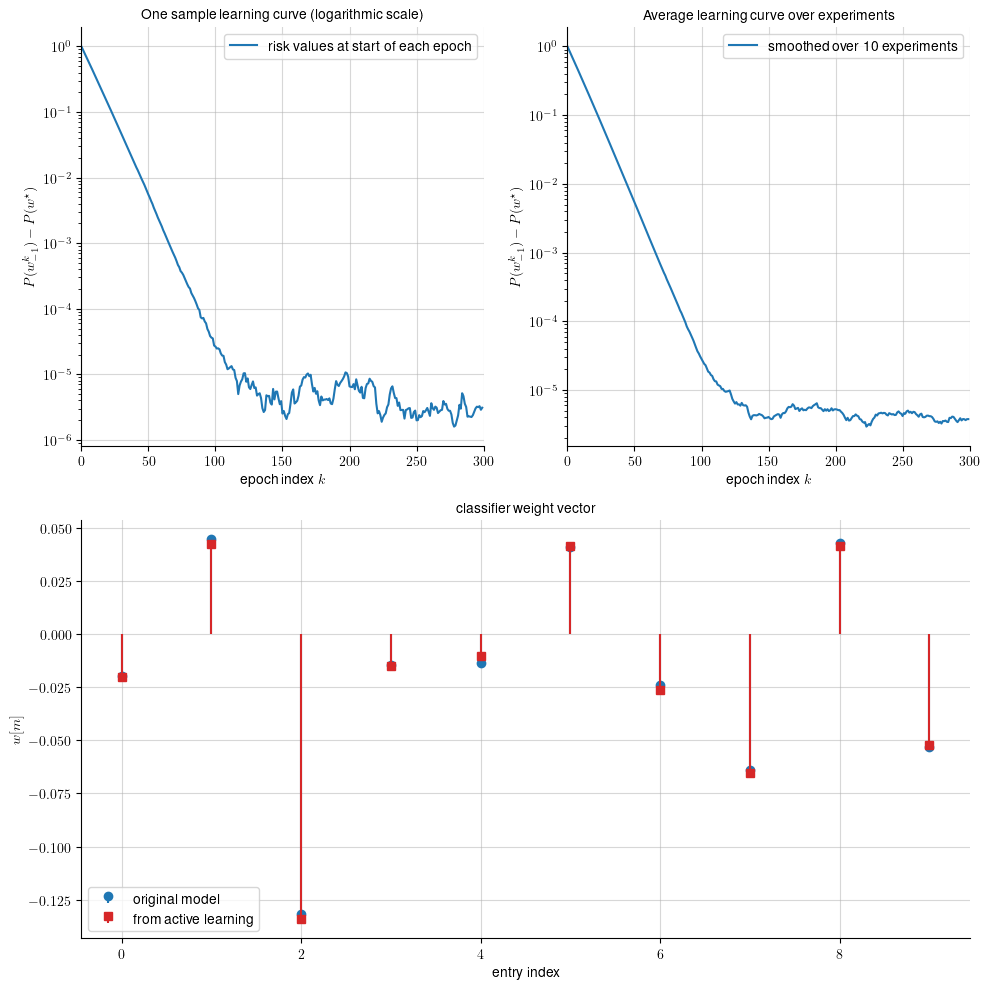

In [368]:
# figure 11 (active learning)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
ax.semilogy(np.arange(K), ((Pactive - Ps)/(Pactive - Ps).max()).squeeze(), label="risk values at start of each epoch")
ax.set_xlabel("epoch index $k$", fontsize=10)
ax.set_ylabel("$P(w_{-1}^k) - P(w^\star)$", fontsize=10)
ax.set_title("One sample learning curve (logarithmic scale)", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.set_xlim([0, 300])
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(2, 2, 2)
ax.semilogy(np.arange(K), ((Pmeanactive - Ps)/(Pmeanactive - Ps).max()).squeeze(), label="smoothed over 10 experiments")
ax.set_xlabel("epoch index $k$", fontsize=10)
ax.set_ylabel("$P(w_{-1}^k) - P(w^\star)$", fontsize=10)
ax.set_title("Average learning curve over experiments", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.set_xlim([0, 300])
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(2, 2, (3, 4))
markerline, stemlines, baseline = ax.stem(np.arange(M), ws.squeeze(), label="original model")
markerline_, stemlines_, baseline_ = ax.stem(np.arange(M), wa.squeeze(), label="from active learning")
plt.setp(stemlines_, 'color', 'tab:red')
plt.setp(stemlines, 'linewidth', 1.5)
plt.setp(baseline, 'linewidth', 0)
plt.setp(markerline_, 'color', 'tab:red')
plt.setp(stemlines_, 'linewidth', 1.5)
plt.setp(baseline_, 'linewidth', 0)
plt.setp(markerline_, 'marker', 's')
ax.set_xlabel("entry index", fontsize=10)
ax.set_ylabel("$w[m]$", fontsize=10)
ax.set_title("classifier weight vector", fontsize=10)
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-11.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.11** ($\textit{Top left}$) A sample learning curve $P(w_{-1}^k)$ relative to the minimum risk value $P(w^{\star})$ in normalized logarithmic scale for the stochastic gradient implementation (59.35) under random reshuffling. ($\textit{Top right}$) Smoothed learning curve obtained by averaging over $10$ experiments. ($\textit{Bottom}$) Actual logistic regression model $w^a$ and the estimate for it obtained through active learning.

## Example 59.7 (Domain adaptation applied to logistic data)

We generate $N_S=100$ random pairs of source data points $\{\gamma(n),h_n\}$ according to a logistic model. First, a random parameter model $w_S\in\mathbb{R}^{2}$ is selected, and a random collection of feature vectors $\{h_n\}$ are generated with zero-mean unit-variance Gaussian entries. Then, for each $h_n$, the label $\gamma(n)$ is set to either $+1$ or $-1$ according to the following construction:

$$
\gamma(n)=+1\;\;\;\textnormal{ if}\;\;\;\Bigl(\frac{1}{1+e^{-h_n^{\sf T} w_S}}\Bigr)\geq 1/2,\;\;\;\textnormal{ otherwise}\;\gamma(n)=-1 \tag{59.67}
$$

We generate a second set of $N_T=100$ random pairs of target data points $\{\gamma(n),h_n\}$ by using a similar logistic construction albeit with a different parameter model $w_T\in\mathbb{R}^{2}$.\

In [421]:
# Domain adaptation applied to logistic data
# l2-regularized logistic regression
# P(w) = rho\|w\|^2 + (1/N)sum_{n=0}^{N-1} ln(1+exp(-gamma(m) h_m' w))

rho = 1 # l2-regularization parameter
mu = 0.0001 # step-size for stochastic gradient

M = 2 # feature size
N1 = 100 # number of source samples
N2 = 100 # number of target samples
K = 100 # number of epochs

print("wait....generating data")

# Generating data for TWO logistic regression models and checking them
z1 = np.random.randn(M) # underlying parameter model for logistic data
p, gamma_vec1, H1 = generate_separable_logistic(N1,z1,0) # logistic model with zero offset

z2 = np.random.randn(M) # underlying parameter model for logistic data
p, gamma_vec2, H2 = generate_separable_logistic(N2,z2,0) # logistic model with zero offset

wxinit = np.random.randn(M+1) # initial condition for weight wx

H = np.concatenate([H1, H2], axis=-1) # source and target feature vectors 
gamma = np.concatenate([np.ones(N1), -np.ones(N2)]) # source and target labels
Hrand = np.zeros((M, N1+N2)) # we will randomly reshuflle the features
gammarand = np.zeros(N1+N2)

wx = wxinit.copy()
for k in range(K): # repeat over several runs
    URR = np.random.permutation(N1+N2) # randomly reshuffle the data at beginning of each run
    for s in range(N1+N2):
        u = URR[s]
        Hrand[:, s] = H[:, u]
        gammarand[s] = gamma[u]
    
    for n in range(N1+N2): # now we train a logistic classifier to distinguish between source and target samples
        h_u = np.concatenate([np.ones(1), Hrand[:, n]]) # feature vector
        gamma_u = gammarand[n] # label
        a = np.exp(-gamma_u*h_u.T@wx)
        s = gamma_u*h_u*a/(1+a) # gradient vector
        wx = (1-2*mu*rho)*wx + mu*s

N_hat_S = N1
N_hat_T = N2 
alpha = np.zeros(N1)
for n in range(N1): # alpha's for source data
    h_u = np.concatenate([np.ones(1), H1[:, n]])
    gamma_u_hat = h_u.T@wx 
    alpha[n] = (N_hat_S/N_hat_T)*np.exp(-gamma_u_hat)

winit = np.random.randn(M) # no offset parameter used here
w = winit.copy()
alpharand = np.zeros(N1)

H1rand = np.zeros(H1.shape)
gamma1rand = np.zeros(gamma_vec1.shape)

for k in range(K): # multiple runs
    URR = np.random.permutation(N1) # randomly reshuffle the data at beginning of each run
    for r in range(N1):
        u = URR[r]
        H1rand[:, r] = H1[:, u]
        gamma1rand[r] = gamma_vec1[u]
        alpharand[r] = alpha[u]

    for n in range(N1): # training over labeled source data
        h_u = H1rand[:, n] # feature vector
        gamma_u = gamma1rand[n] # label
        a = np.exp(-gamma_u*h_u.T@w)
        s = gamma_u*h_u*a/(1+a) # gradient vector
        w = (1-2*mu*rho)*w + mu*alpharand[n]*s 

gamma_hat_2 = np.zeros(N2)
for n in range(N2): # predicted labels for target samples
    h_u = H2[:, n] # feature vector
    gamma_u = gamma_vec2[n] # label
    gamma_hat_u = h_u.T@w 
    if gamma_hat_u >= 0:
        gamma_hat_2[n] = + 1
    else:
        gamma_hat_2[n] = - 1

error = 0
for n in range(N2): # counting classification error over target samples
    if gamma_vec2[n] != gamma_hat_2[n]:
        error += 1

print("classification error: ", (error/N2)*100)

print("step size", mu)

print("number of source samples", N1)

print("number of target samples", N2)

print("rho", rho)

print("number of runs", K)

# let wx = [wx1 wx2 wx3]',  h = [1 h1 h2]
# equation of separating hyperplane is h_1 wx_2 + h_2 wx_3 +wx1 = 0

z = np.arange(-4, 4, 0.1)
h1 = z 
h2 = (-wx[0] - h1*wx[1])/wx[2] # used to plot the separating line

# let w = [w1 w2]',  h = [h1 h2]
# equation of separating hyperplane is h_1 w_1 + h_2 w_2= 0
ha1 = z 
ha2 = -ha1*w[0]/w[1] # used to plot the separating line

# preparing data for plotting
Z_a = (H[:, np.argwhere(gamma.reshape(-1) == 1).squeeze()]).reshape(-1, 2)
Z_b = (H[:, np.argwhere(gamma.reshape(-1) == -1).squeeze()]).reshape(-1, 2)

Zs_1 = (H1[:, np.argwhere(gamma_vec1.reshape(-1) == 1).squeeze()]).reshape(-1, 2)
Zs_2 = (H1[:, np.argwhere(gamma_vec1.reshape(-1) == -1).squeeze()]).reshape(-1, 2)

Zt_1 = (H2[:, np.argwhere(gamma_vec2.reshape(-1) == 1).squeeze()]).reshape(-1, 2)
Zt_2 = (H2[:, np.argwhere(gamma_vec2.reshape(-1) == -1).squeeze()]).reshape(-1, 2)

Zt_1_hat = (H2[:, np.argwhere(gamma_hat_2.reshape(-1) == 1).squeeze()]).reshape(-1, 2)
Zt_2_hat = (H2[:, np.argwhere(gamma_hat_2.reshape(-1) == -1).squeeze()]).reshape(-1, 2)

wait....generating data
classification error:  0.0
step size 0.0001
number of source samples 100
number of target samples 100
rho 1
number of runs 100


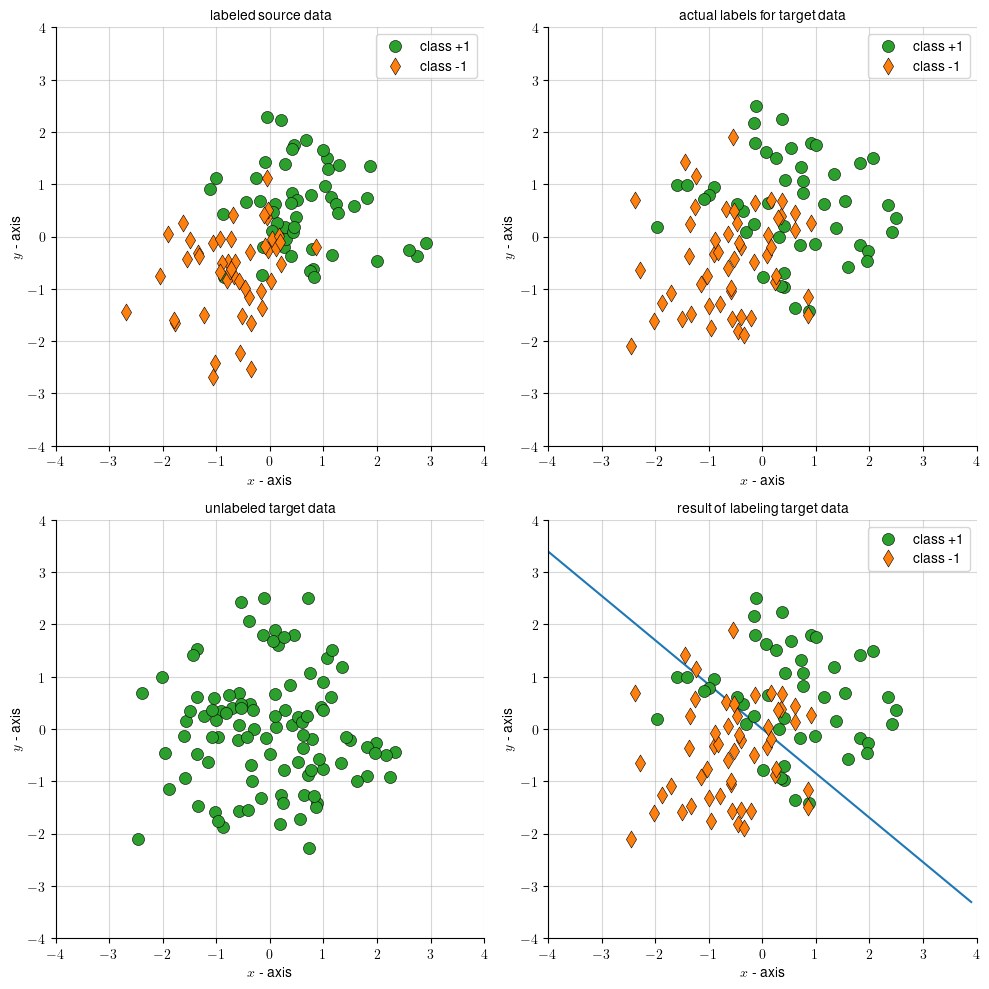

In [423]:
# figure 12 (domain adaptation)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 10
fig = plt.figure()

ax = fig.add_subplot(221)
ax.scatter(Zs_1[:, 0], Zs_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
ax.scatter(Zs_2[:, 0], Zs_2[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class -1", marker="d")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("labeled source data", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(222)
ax.scatter(Zt_1[:, 0], Zt_1[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
ax.scatter(Zt_2[:, 0], Zt_2[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class -1", marker="d")
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("actual labels for target data", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

ax = fig.add_subplot(223)
ax.scatter(Z_b[:, 0], Z_b[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("unlabeled target data", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)

ax = fig.add_subplot(224)
ax.scatter(Zt_1_hat[:, 0], Zt_1_hat[:, 1], zorder=3, c="tab:green", edgecolor="black", linewidth=0.4, s=75, label="class +1")
ax.scatter(Zt_2_hat[:, 0], Zt_2_hat[:, 1], zorder=3, c="tab:orange", edgecolor="black", linewidth=0.4, s=75, label="class -1", marker="d")
ax.plot(ha1, ha2)
ax.set_xlabel("$x$ - axis", fontsize=10)
ax.set_ylabel("$y$ - axis", fontsize=10)
ax.set_title("result of labeling target data", fontsize=10)
ax.set_ylim([-4, 4])
ax.set_xlim([-4, 4])
plt.grid(zorder=0, alpha=0.5)
ax.spines[['right', 'top']].set_visible(False)
plt.legend()

plt.tight_layout()

plt.savefig("figs/fig-12.pdf", format="pdf", bbox_inches="tight")

plt.show()

**Figure 59.12** ($\textit{Top left}$) Scatter diagram for the labeled source samples. ($\textit{Top right}$) Scatter diagram for the labeled target samples. ($\textit{Bottom left}$) Unlabeled target samples. ($\textit{Bottom right}$) Predicted labels for the target samples.

A total of $K=100$ epochs are run over the data, with the data randomly reshuffled prior to each run. Although the source and target features  are not linearly separable in this example, we still  train a logistic classifier $w^x$ to separate between source and target data, as explained prior to the example. The result is (where, due to the extension, the top entry is the offset $\theta^x$ for the classifier):

$$
\begin{bmatrix}-\theta^x\\\hline w^x\end{bmatrix}=\begin{bmatrix}-0.0021\\\hline-0.0002\\-0.0022\end{bmatrix} \tag{59.68}
$$

We use the result to determine  the scalars $\{\alpha(n)\}$ for the labeled source samples, and apply the logistic regression recursion to the source data. We again run $K=100$ epochs and perform random reshuffling at the start of each run, leading to the estimate (no offset was used in this case):

$$
w^{\star}=\begin{bmatrix}-0.0846\\-0.1296\end{bmatrix} \tag{59.69}
$$

We use  $w^{\star}$ to classify the target samples into classes $+1$ or $-1$. The simulation uses $\rho=1$, $\mu=0.0001$, and $M=2$. Figure 59.12 shows the scatter diagrams for the labeled source and target data in the top row for comparison purposes. In the implementation, we are actually assuming that the labels for the target data are not known, as shown in the bottom row of the figure, and employ the above construction to predict their labels.  For this example, the classification error is $3$%. For this example, the classification error is $19$%.

It is not difficult to observe from repeating this experiment that the domain adaptation procedure fails more often than desirable. This is because the source and target samples are not generally linearly separable, which results in poor estimates for $\{\alpha(n)\}$. 
